---
# Ejercicio 4
Desarrolle un método para generar la variable aleatoria con función de distribución
$$
F(x) = \int_{0}^{\infty} x^y e^{-y} \, dy, \quad 0 \leq x \leq 1.
$$
Piense en el método de composición del ejercicio anterior. En particular, sea F la función de distribución
de X y suponga que la distribución condicional de X dado Y = y es
$$
P(X \leq x \mid Y = y) = x^y, \quad 0 \leq x \leq 1
$$

Con la ayuda anterior y como la integral está respecto a $y$ tenemos que:
$$
F(X) = \int_0^{\infty} P(X\leq x \mid Y=y) \cdot e^{-y} dy \Longrightarrow f_Y(y)=e^y ,\quad 0\leq y
$$

Luego $Y\thicksim \mathcal{E} (1)$ dado que la densidad de una v.a con distro. exponencial está dada por: $\lambda \cdot e^{-\lambda \cdot y}$ y en este caso:

$$
    
     f_Y(y) = \lambda \cdot e^{-\lambda \cdot y} = 1 \cdot e^{-1 \cdot y} = e^{-y}
$$

Entonces para generar F, debemos primero generar Y. Como es una exponencial, es fácil pero antes chequeemos con resultados teóricos

---
## Resultados Teóricos

- Tenemos como dato que $P(X \leq x \mid Y = y) = x^y, \quad 0 \leq x \leq 1\text{ la cual representa a } f_{X\mid Y=y}\\[0.3cm]$
- Luego $X\mid Y=y \thicksim Beta(\alpha=y, \beta=1)$ (Dem muy larga pero la verda es posta [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) y ChatGPT)
- Por resultados teóricos tenemos que $F'(X) = f(x) \text{(cuando la derivada existe)}$. Luego derivando obtenemos que:
$$
f_{X\mid Y=y}(x) = y\cdot x^{y-1}, \quad \text{para }0<x<1 \\[0.5cm]
$$

- Por otro lado la densidad conjunta $f_{X,Y}(x,y) = f_{X\mid Y=y}(x) \cdot f_Y(y)$ por definición, luego:
$$
f_{X,Y}(x,y) = y\cdot x^{y-1}\cdot e^{-y}
$$

- Si calculamos la marginal $f_X$, obtenemos que:
$$
f_X(x) = \int_0^{\infty} f_{X,Y}(x,y) dy = \int_0^{\infty} y\cdot x^{y-1}\cdot e^{-y} dy =  \int_0^{\infty} \frac{d}{dx}(x^y \cdot e^{-y}) dy = \frac{d}{dx}F(X) = F'(X)
$$
---
Luego de generar Y con el método de la transformada inversa, nos queda generar la condicional.

 Como vimos que $P(X\leq x \mid Y=y) = x^y \Rightarrow U = x^y \Rightarrow \sqrt[y]{U} = x $
 
Luego generamos el algoritmo:

In [9]:
from random import random
from math import log
import seaborn as sns
import  matplotlib.pyplot as plt

In [5]:
def Y(lamda:float) -> float:
    """
    Variable aleatoria con distribución exponencial

    Args:
        lamda (float): parámetro de la distribución

    Returns:
        float: Valor aleatorio
    """
    U = 1 - random()
    return -log(U) / lamda

def X_given_Y(y:float) -> float:
    """
    Variable aleatoria X dado Y=y

    Args:
        y (float): valor de y

    Returns:
        float: Valor aleatorio x dado que Y=y
    """
    return random() ** (1/y)

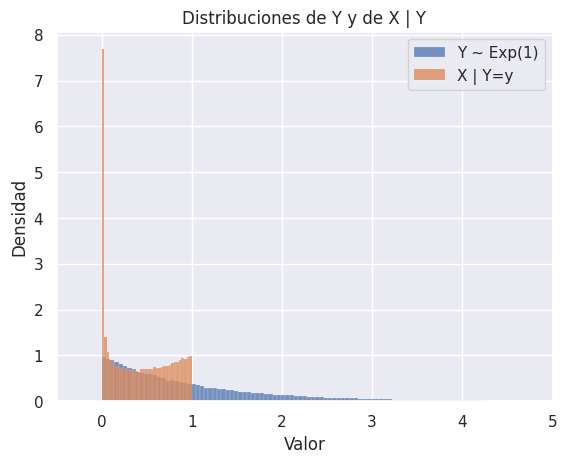

In [21]:
lamda = 1
Nsim = 100_000

Y_samples = [Y(lamda=lamda) for _ in range(Nsim)]
X_given_Y_samples = [X_given_Y(y) for y in Y_samples]

sns.set_theme(style='darkgrid')
sns.histplot(Y_samples, stat='density', label="Y ~ Exp(1)")
sns.histplot(X_given_Y_samples, stat='density', label="X | Y=y")
plt.title("Distribuciones de Y y de X | Y")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.xlim(-0.5,5)
plt.legend()
plt.show()